In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/1739526192_rolling_stones_spotify.zip'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
data.shape

(1610, 18)

In [ ]:
print("\nMissing values count per column:")
data.isnull().sum()


Missing values count per column:


,0
Unnamed: 0,0
name,0
album,0
release_date,0
track_number,0
id,0
uri,0
acousticness,0
danceability,0
energy,0


In [ ]:
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_year'] = data['release_date'].dt.year
print(data.head())

   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

In [ ]:
columns_to_drop = ['Unnamed: 0', 'id', 'uri']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]

if existing_columns_to_drop:
    data.drop(columns=existing_columns_to_drop, inplace=True)
    print(data.head())
else:
    print("Columns 'Unnamed: 0', 'id', 'uri' already dropped or not found.")

                          name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popu

In [ ]:
data.describe()


,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199,1991.745963
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000,1964.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000,1970.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000,1986.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000,2017.000000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000,2022.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920,22.440296


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

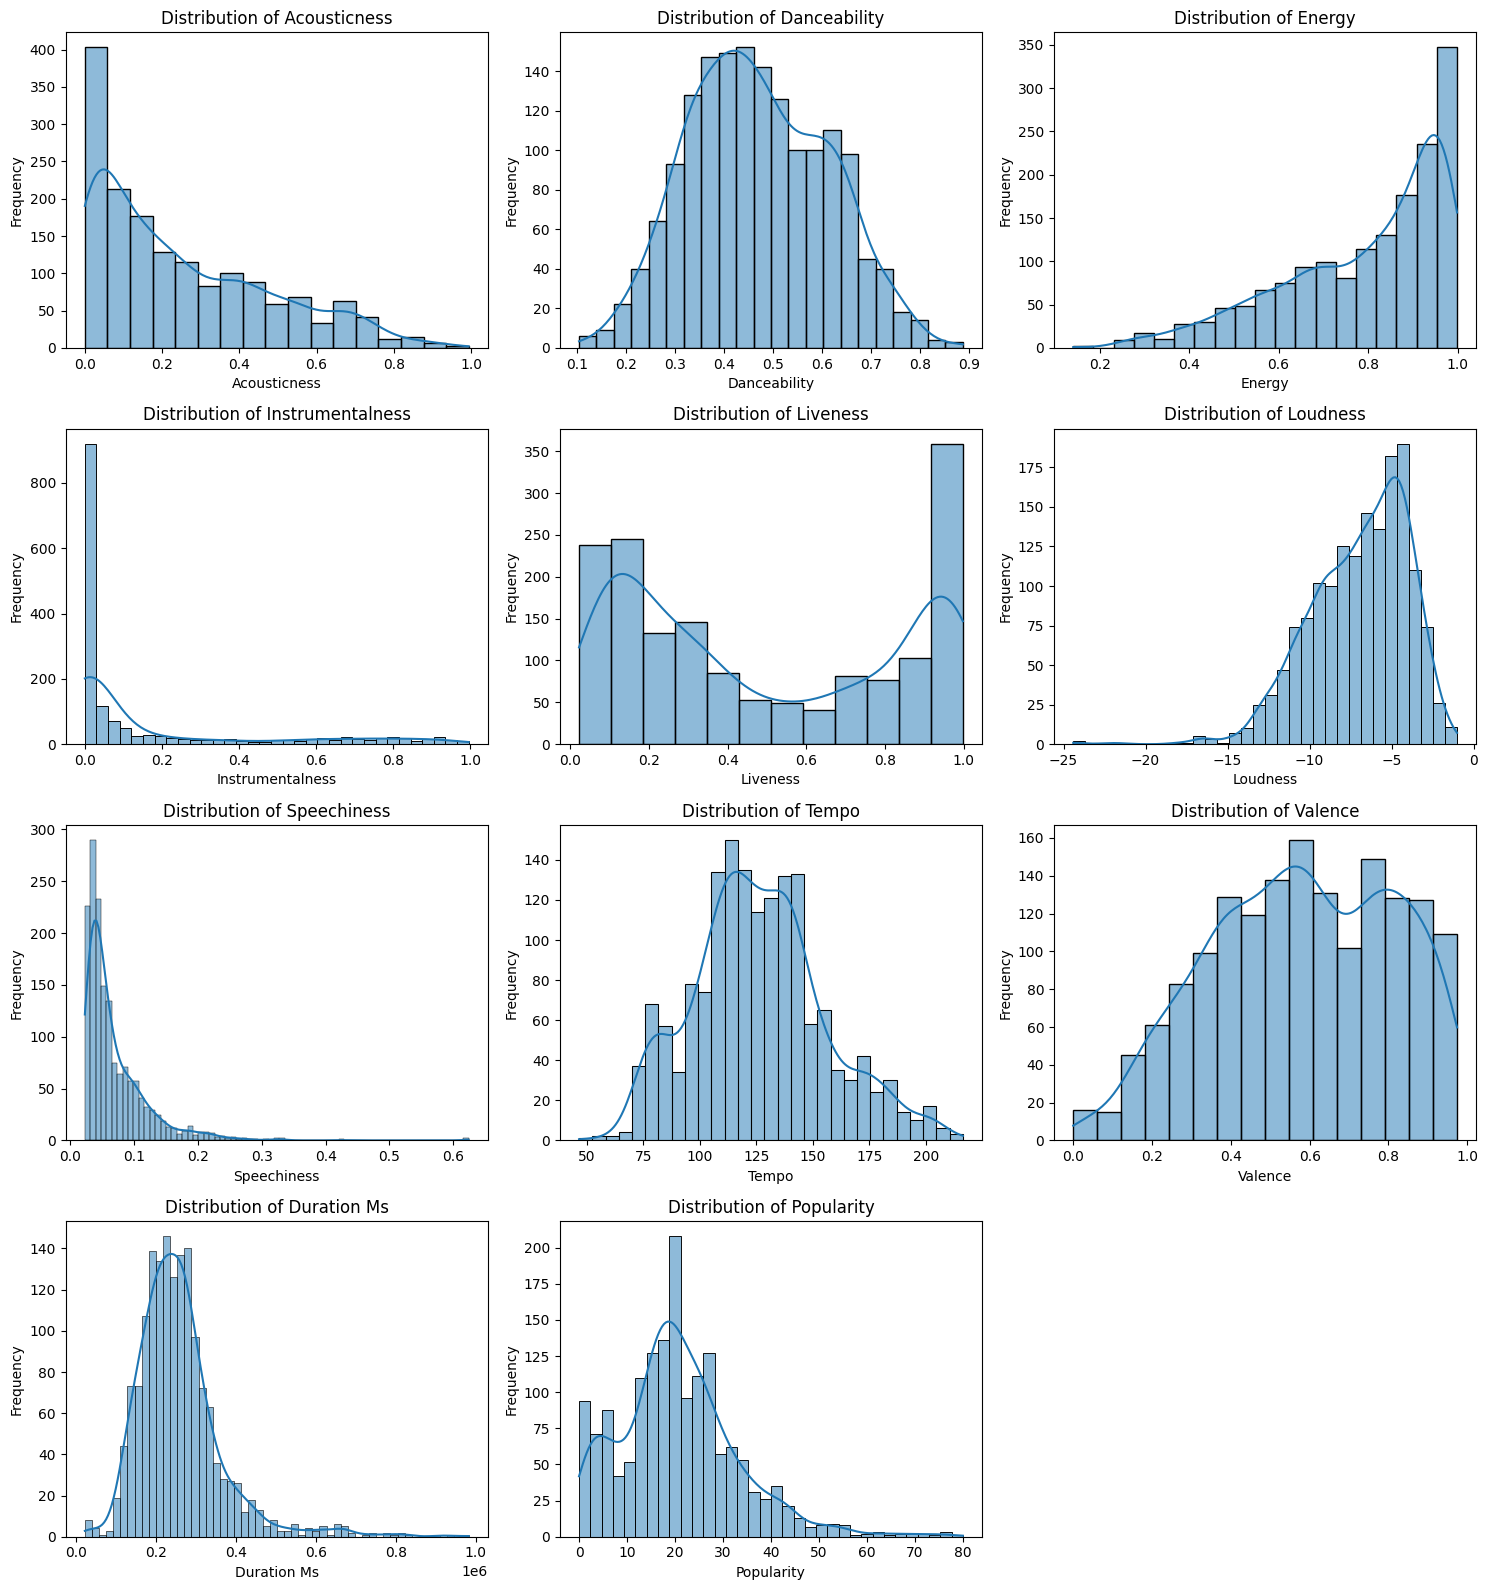

In [ ]:
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'popularity']

# Determine grid size (e.g., 4 rows, 3 columns for 11 plots)
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


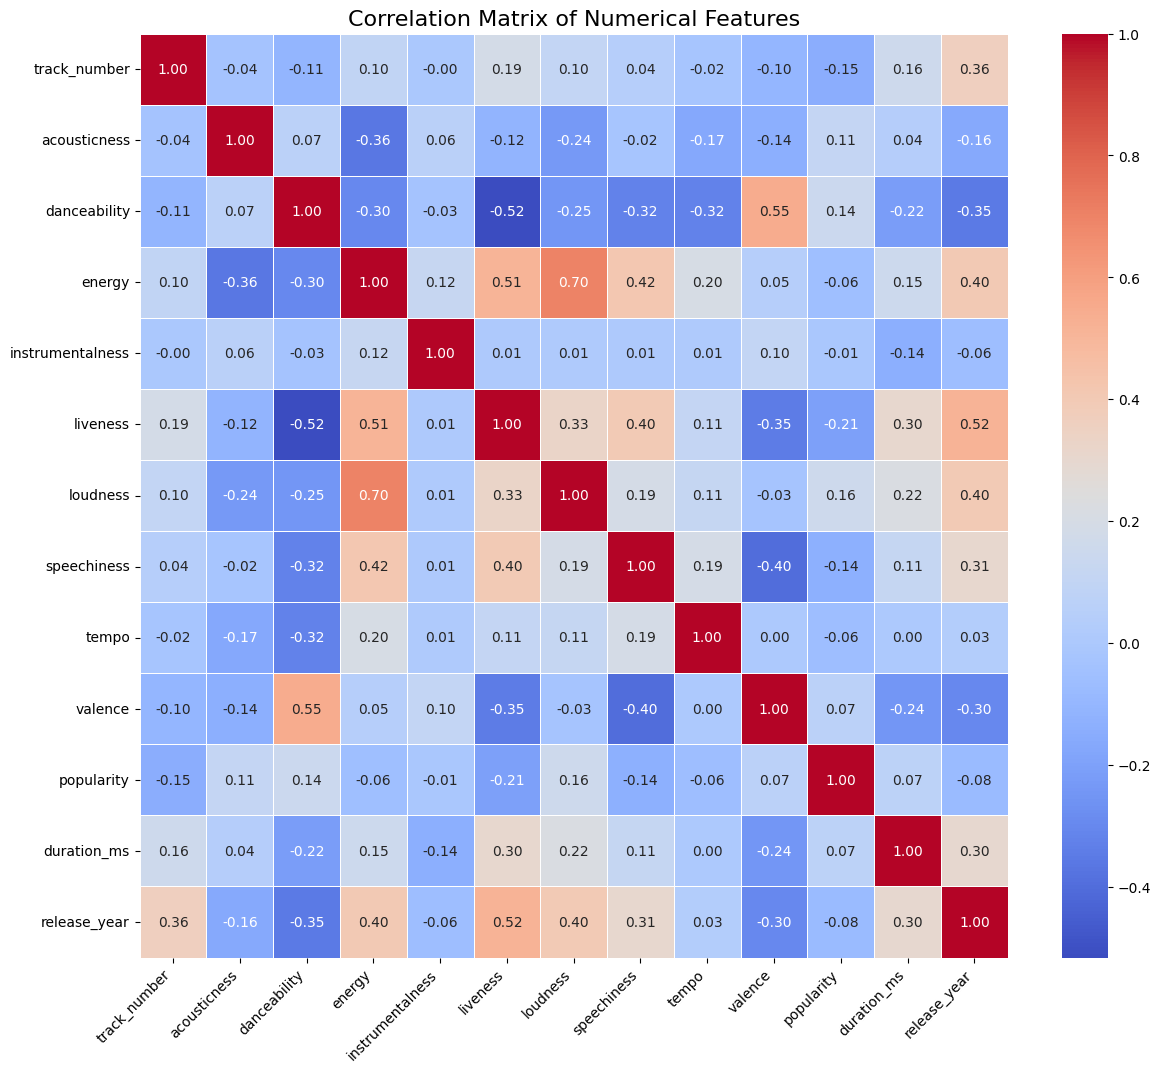

In [ ]:
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

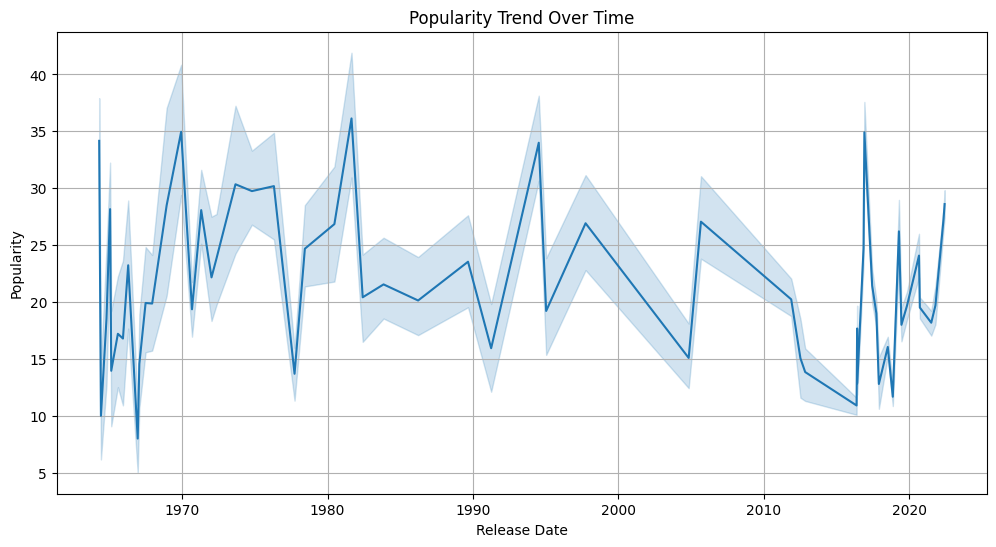

In [ ]:
data['release_date'] = pd.to_datetime(data['release_date'])
data_sorted = data.sort_values(by='release_date')

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='popularity', data=data_sorted)
plt.title('Popularity Trend Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [ ]:
print("\n--- Top 10 Most Popular Tracks ---")
top_10_popular_tracks = data.sort_values(by='popularity', ascending=False).head(10)
print(top_10_popular_tracks[['name', 'album', 'popularity']].to_markdown(index=False))

print("\n--- Top 10 Least Popular Tracks ---")
least_10_popular_tracks = data.sort_values(by='popularity', ascending=True).head(10)
print(least_10_popular_tracks[['name', 'album', 'popularity']].to_markdown(index=False))

print("\n--- Top 10 Most Popular Albums by Average Song Popularity ---")
top_10_popular_albums = data.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
print(top_10_popular_albums.to_markdown())


--- Top 10 Most Popular Tracks ---
| name                                              | album                                      |   popularity |
|:--------------------------------------------------|:-------------------------------------------|-------------:|
| Paint It, Black                                   | Aftermath                                  |           80 |
| (I Can't Get No) Satisfaction - Mono Version      | Out Of Our Heads                           |           76 |
| Start Me Up - Remastered 2009                     | Tattoo You (2009 Re-Mastered)              |           76 |
| Gimme Shelter                                     | Let It Bleed                               |           76 |
| Sympathy For The Devil - 50th Anniversary Edition | Beggars Banquet (50th Anniversary Edition) |           73 |
| Beast Of Burden - Remastered 1994                 | Some Girls                                 |           72 |
| Angie                                             

In [ ]:
audio_features = [feature for feature in numerical_features if feature not in ['release_year', 'track_number']]
features_for_clustering = data[audio_features]

print("Features selected for clustering:")
print(features_for_clustering.head())

Features selected for clustering:
   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  duration_ms  popularity  
0       0.1100  118.001   0.0302        48640          33  
1       0.0759  131.455   0.3180       253173          34  
2       0.1150  130.066   0.3130       263160          34  
3       0.1930  132.994   0.1470       305880          32  
4       0.0930  130.533   0.2060       305106          32  


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

print("Shape of scaled features:", scaled_features.shape)
print("First 5 rows of scaled features (array form):\n", scaled_features[:5])

Shape of scaled features: (1610, 11)
First 5 rows of scaled features (array form):
 [[-0.73935481 -0.0413433   1.11576419  3.01209943  1.26155158 -1.98504535
   0.78440988 -0.27651662 -2.38759041 -1.9307186   0.98299941]
 [ 0.82051776 -1.00796305  0.96006155  0.24923772  1.34464824  0.72454468
   0.12375349  0.18385207 -1.14267825 -0.04213754  1.06349527]
 [ 0.72813952 -0.58462593  0.98230478  0.85395319  1.33032123  0.68010874
   0.88128032  0.1363233  -1.16430633  0.05007868  1.06349527]
 [ 1.39238306 -0.70457145  1.07127772 -0.59407965  1.15553171  0.47997995
   2.39245916  0.23651354 -1.88235852  0.44453914  0.90250356]
 [ 0.6577561  -1.17024228  0.98230478 -0.39205036  1.35897525  0.62598376
   0.45505039  0.1523031  -1.6271472   0.43739232  0.90250356]]


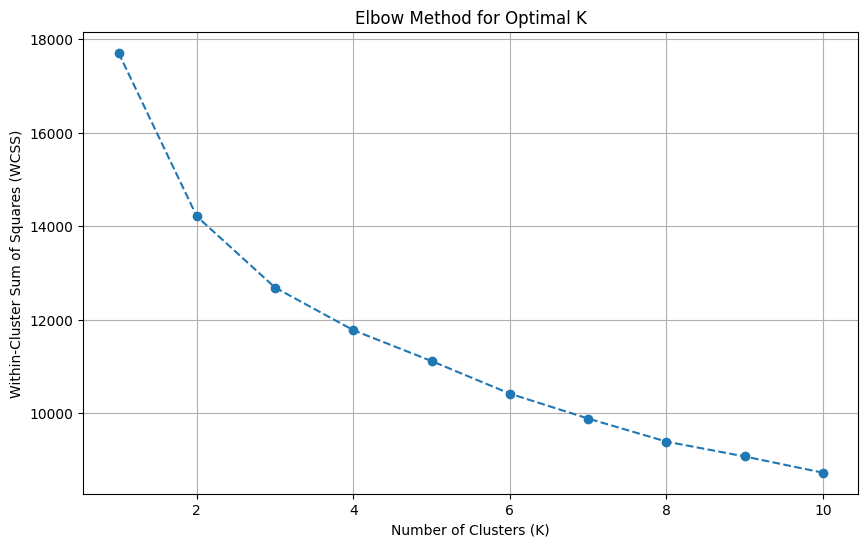

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
# Try a range of clusters, e.g., from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


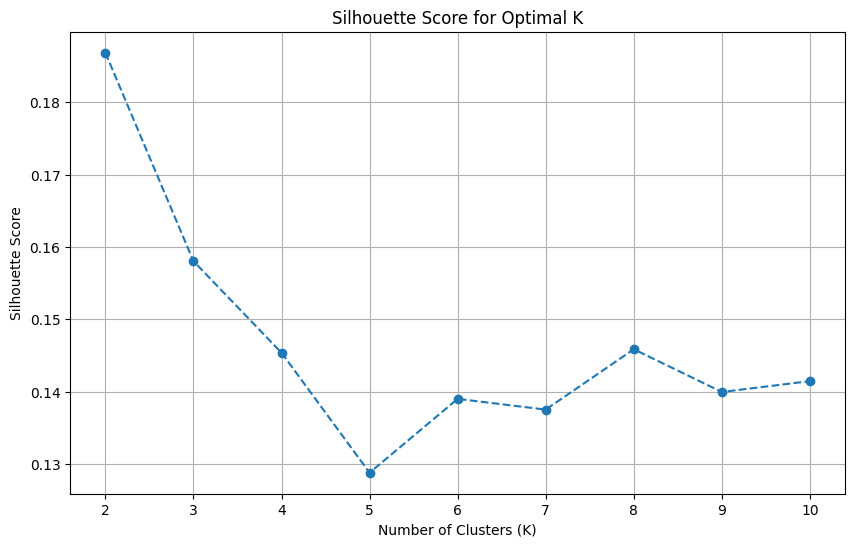

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
# Silhouette Score is not defined for k=1, so start from 2
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
Skmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
data['cluster_label'] = kmeans.fit_predict(scaled_features)

print("First 5 rows of data with cluster labels:")
print(data[['name', 'album', 'popularity', 'cluster_label']].head())

First 5 rows of data with cluster labels:
                          name               album  popularity  cluster_label
0   Concert Intro Music - Live  Licked Live In NYC          33              3
1   Street Fighting Man - Live  Licked Live In NYC          34              3
2           Start Me Up - Live  Licked Live In NYC          34              3
3  If You Can't Rock Me - Live  Licked Live In NYC          32              3
4            Don’t Stop - Live  Licked Live In NYC          32              3


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

print("Shape of PCA components:", pca_components.shape)
print("First 5 rows of PCA components:\n", pca_components[:5])

Shape of PCA components: (1610, 2)
First 5 rows of PCA components:
 [[ 0.83623429 -0.64626881]
 [ 1.82381886 -0.53157658]
 [ 1.94580169 -0.44765228]
 [ 2.63887473 -1.72158269]
 [ 2.2626308  -1.05750769]]


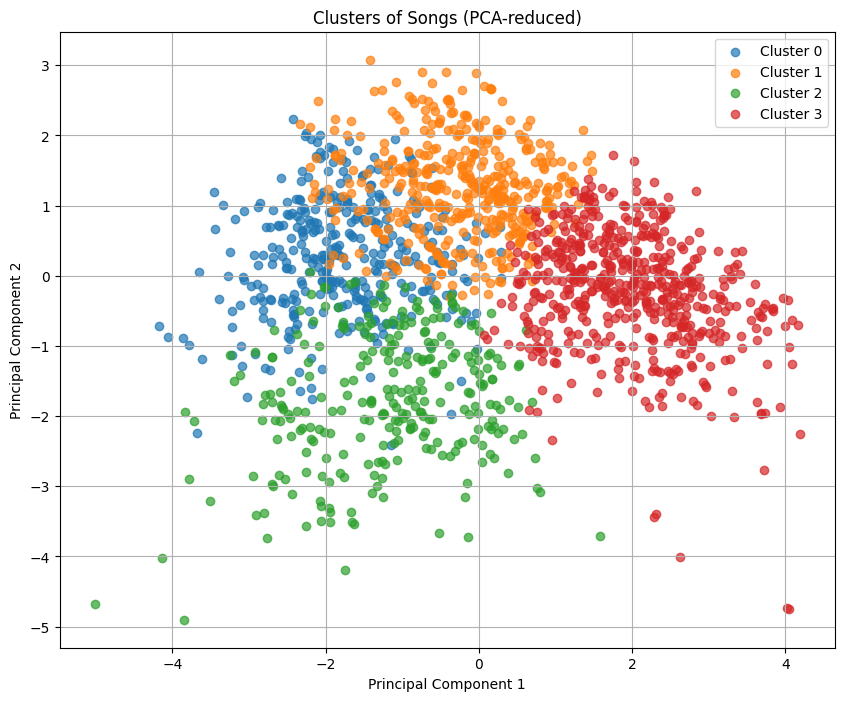

In [ ]:
plt.figure(figsize=(10, 8))
unique_clusters = sorted(data['cluster_label'].unique())

for cluster in unique_clusters:
    plt.scatter(
        pca_components[data['cluster_label'] == cluster, 0],
        pca_components[data['cluster_label'] == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.7
    )

plt.title('Clusters of Songs (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Characterize Clusters

### Subtask:
Characterize each cluster based on the mean values of the original (unscaled) audio features. This will provide insights into the common characteristics of songs within each cluster.

**Reasoning**:
To characterize each cluster, I will group the original DataFrame `data` by `cluster_label` and calculate the mean of the `audio_features` for each cluster. This will show the average values for each feature within each cluster, making it easier to interpret their distinct characteristics.

SyntaxError: invalid syntax (ipython-input-420737774.py, line 4)

In [ ]:
cluster_characteristics = data.groupby('cluster_label')[audio_features].mean()

print("\nMean values of audio features per cluster:")
print(cluster_characteristics.to_markdown())


Mean values of audio features per cluster:
|   cluster_label |   acousticness |   danceability |   energy |   instrumentalness |   liveness |   loudness |   speechiness |   tempo |   valence |   duration_ms |   popularity |
|----------------:|---------------:|---------------:|---------:|-------------------:|-----------:|-----------:|--------------:|--------:|----------:|--------------:|-------------:|
|               0 |       0.212201 |       0.590086 | 0.669417 |          0.183088  |   0.232928 |   -9.87845 |     0.0475807 | 122.647 |  0.755978 |        187121 |      15.0608 |
|               1 |       0.189662 |       0.521806 | 0.878566 |          0.220762  |   0.372886 |   -4.99509 |     0.0519483 | 123.777 |  0.748251 |        244226 |      27.7559 |
|               2 |       0.509653 |       0.454377 | 0.564185 |          0.0754464 |   0.323836 |   -9.10164 |     0.0470224 | 110.497 |  0.393184 |        273125 |      25.1779 |
|               3 |       0.189354 |       0.354809